# Finding shadows in images using Python's `scikit-image` package

Ever noticed how shadows can make photos look cool or kinda tricky for editing? Well, guess what? With some Python magic and a handy tool called scikit-image, you can become a shadow-busting wizard in no time!

In this quick guide, we're diving into the nifty world of shadow segmentation. Don't worry; it's just a fancy way of saying we're going to teach you how to spot and separate shadows from the rest of your image. Why? Because sometimes you just need to clear things up a bit, whether you're tweaking photos or working on a cool project that needs shadow detection.

We'll start with the basics—loading up an image and flipping it into HSV color space. This helps us really see where those sneaky shadows are hiding. Then, with a couple of smart tricks and some threshold magic, we'll show you how to pinpoint those shadows. And to keep things neat, we'll even clean up any small bits and bobs that don't belong.

In [9]:
# %pip install numpy scikit-image matplotlib

In [8]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

In [3]:
# get sample image
image_rgb = skimage.data.stereo_motorcycle()[0]

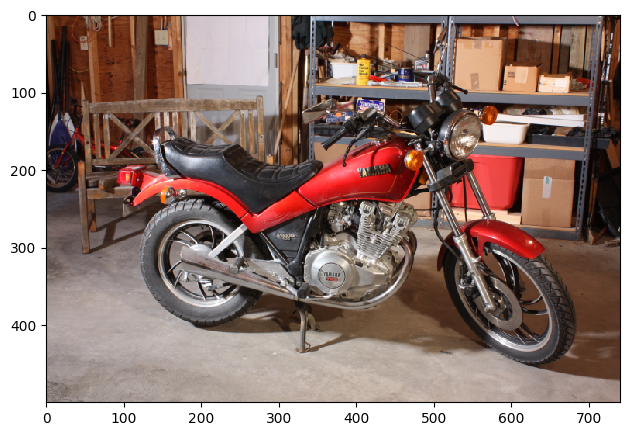

In [4]:
# sense check (show the image)
skimage.io.imshow(
    image_rgb,
)

In [5]:
# Convert the image to HSV color space
image_hsv = skimage.color.rgb2hsv(image_rgb)
hue = image_hsv[:, :, 0]
brightness = image_hsv[:, :, 2]

# Find global threshold on the lightness and hue to detect dark (shadow) regions
brightness_thresh = skimage.filters.threshold_otsu(
    brightness,
)
hue_thresh = skimage.filters.threshold_otsu(
    hue,
)

In [6]:
# Create a mask for the shadow regions
shadow_mask = (image_hsv[:, :, 2] < brightness_thresh) & (
    image_hsv[:, :, 0] < hue_thresh
)

# Remove small objects from the mask
shadow_mask = skimage.morphology.remove_small_objects(shadow_mask)

In [7]:
# Mask the image with the shadow mask
image_masked = np.ma.masked_where(
    np.array(
        [
            ~shadow_mask,
            ~shadow_mask,
            ~shadow_mask,
        ]
    ).transpose(1, 2, 0),
    image_rgb,
)

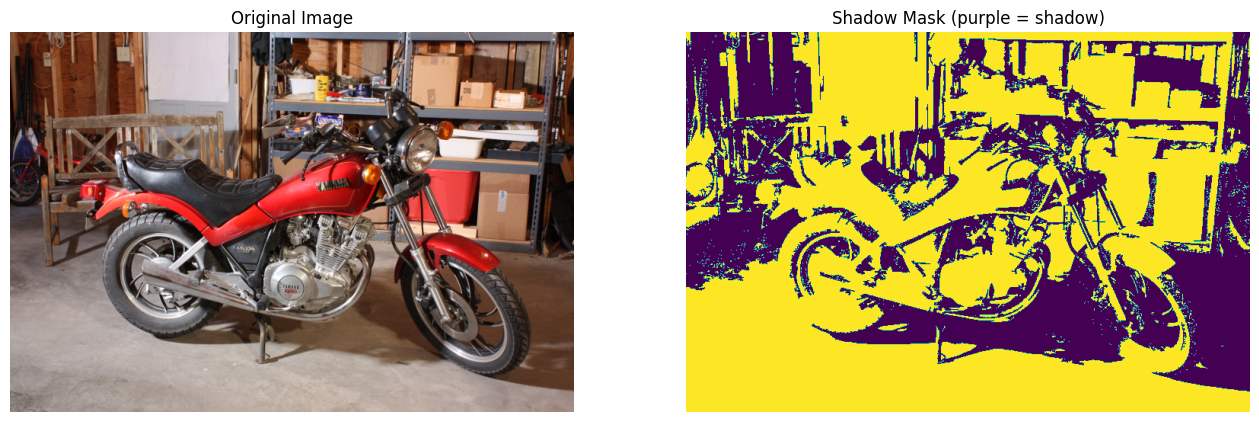

In [48]:
# Display the original image and the shadow mask
fig, ax = plt.subplots(
    1,
    2,
    figsize=(16, 8),
)
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[0].set_aspect("equal")

ax[1].imshow(
    ~shadow_mask,
    # cmap="gray",
)
ax[1].set_title("Shadow Mask (purple = shadow)")
ax[1].axis("off")
ax[1].set_aspect("equal")


plt.show()